In [35]:
df = pd.read_csv("C:/Users/kondu/Downloads/DAY-3/day3_updated_mental_health.csv")  # Make sure file is in same folder or give full path
df.head()


,EmployeeID,BurnoutRisk,BurnoutPrediction_Logistic,BurnoutPrediction_LDA
0,101,1,1,1
1,102,0,0,0
2,103,1,1,1


✅ Decision Tree Accuracy: 1.0
✅ Random Forest Accuracy: 1.0


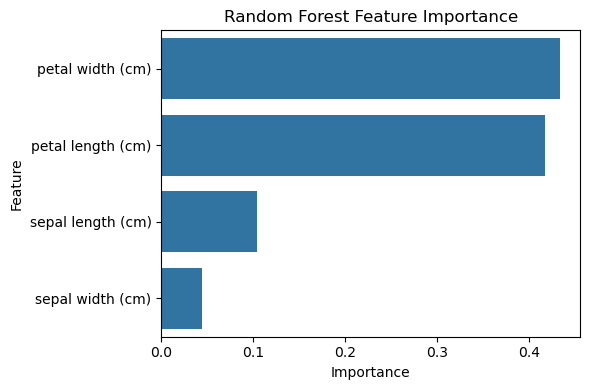

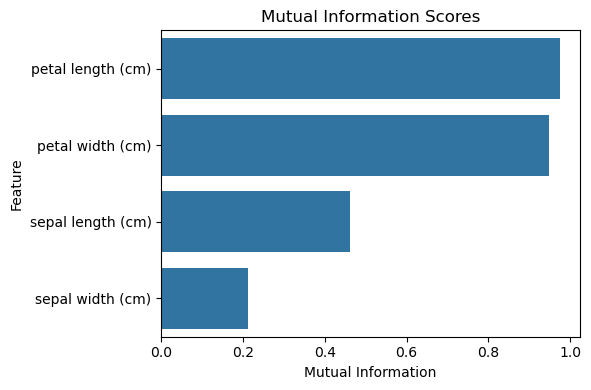

✅ k-NN Accuracy (All Features): 1.0
✅ k-NN Accuracy (Selected Features): 1.0


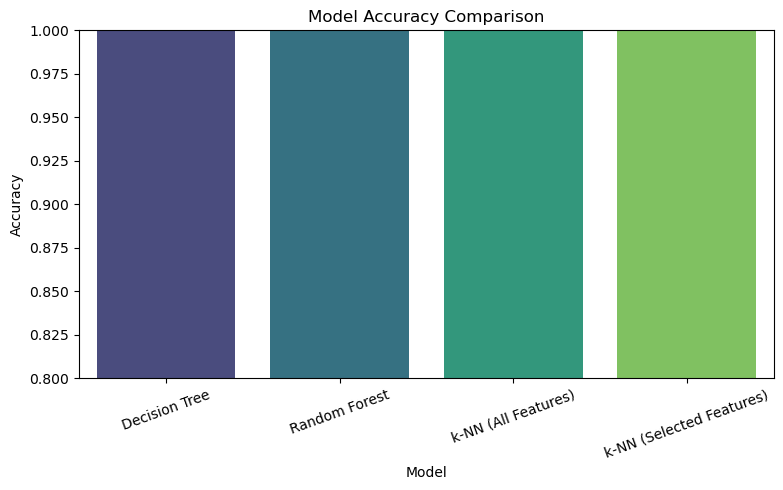

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#  1. Decision Tree 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print("✅ Decision Tree Accuracy:", dt_acc)

rf = RandomForestClassifier(n_estimators=100, random_state=42)#  2. Random Forest 
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("✅ Random Forest Accuracy:", rf_acc)

# --- Feature Importance ---
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

selected_features = feat_imp_df[feat_imp_df['Importance'] > 0.1]['Feature'].tolist()# Select top features (importance > 0.1)
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

mi = mutual_info_classif(X_train, y_train) 3. Mutual Information
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# Plot MI
plt.figure(figsize=(6, 4))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title("Mutual Information Scores")
plt.tight_layout()
plt.show()


knn_all = KNeighborsClassifier(n_neighbors=3) 4. k-NN # (a) All features

knn_all.fit(X_train, y_train)
knn_preds_all = knn_all.predict(X_test)
knn_acc_all = accuracy_score(y_test, knn_preds_all)
print("✅ k-NN Accuracy (All Features):", knn_acc_all)

# (b) Selected features
knn_sel = KNeighborsClassifier(n_neighbors=3)
knn_sel.fit(X_train_sel, y_train)
knn_preds_sel = knn_sel.predict(X_test_sel)
knn_acc_sel = accuracy_score(y_test, knn_preds_sel)
print("✅ k-NN Accuracy (Selected Features):", knn_acc_sel)

acc_df = pd.DataFrame({ #  5. Accuracy Comparison Plot
    'Model': [
        'Decision Tree',
        'Random Forest',
        'k-NN (All Features)',
        'k-NN (Selected Features)'
    ],
    'Accuracy': [dt_acc, rf_acc, knn_acc_all, knn_acc_sel]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, hue='Model', palette='viridis', legend=False)

plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()